# Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
data = pd.read_csv('train.csv')
data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

- The info above showed us that our data has no missing values
- 1 float feature, 11 object feature and 7 int features.
- No_of_previous_employers will have to converted into int

In [4]:
data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


- Describe shows the statstcal distribution of our dataset.

In [5]:
data.shape

(38312, 19)

- Data contains 19 features and 38312 columns

In [6]:
data['No_of_previous_employers'] = data['No_of_previous_employers'].replace('More than 5', 6).astype('int64')

- Replace the string object. I used 6 to represent More than 5 because we had no way of knowing the precise amount. 
- Also converted the feature to int to represent its int value

In [7]:
#convert all the object df to integers 2

columns = ['Division', 'Qualification', 'Gender',
        'Channel_of_Recruitment', 'State_Of_Origin', 'Foreign_schooled',
        'Marital_Status', 'Past_Disciplinary_Action',
        'Previous_IntraDepartmental_Movement']

label_encode = LabelEncoder()
for col in columns:
    data[col] = label_encode.fit_transform(data[col].astype(str))
    

- Our model can't take in string values, so we label encode them.
- We do this to all our categorical feature. This pass a numerical representation to all the feature values.

In [8]:
data['Age_of_Employment'] = data['Year_of_recruitment'] - data['Year_of_birth']

- Created a new column to represent the age an employee was employed.
- Drop the columns used to create the new feature

In [9]:
data.drop(columns=['EmployeeNo', 'Year_of_recruitment', 'Year_of_birth'], inplace=True)

In [10]:
data.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age_of_Employment
0,1,1,0,1,2,12.5,1,0,41,3,0,0,0,0,0,0,25
1,2,0,1,0,2,12.5,0,0,52,3,1,0,0,0,0,0,24
2,1,0,1,1,2,7.5,0,0,42,20,1,0,0,0,0,0,25
3,1,0,1,0,3,2.5,0,0,42,26,1,2,0,0,1,0,27
4,4,0,1,1,3,7.5,0,0,77,2,1,0,0,0,1,0,22


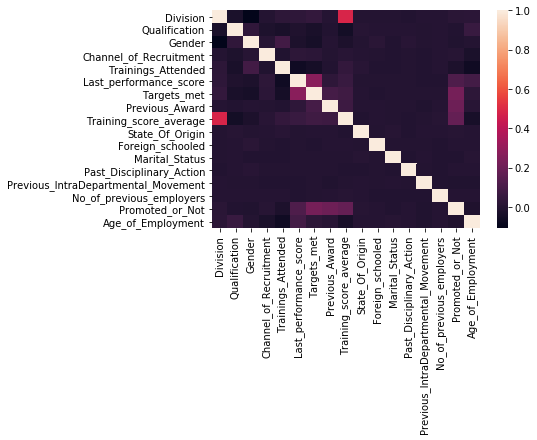

In [11]:
corr = data.corr()
sns.heatmap(corr)

- The above correlaton shows that:
    - There are low correlations between all our features.
    - We only have 2 correlated feature. about 0.45%

In [12]:
y = data['Promoted_or_Not']

data = data.drop(data[['Promoted_or_Not']], axis=1)

- Segment the data and drop the label feature.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, stratify=y)

- Split data into train and test. Our test size is 20% of our training data. Stratify helps in balancing the classes.

# Model Building
    - Built a logstic regression model and a knn model.
    - Start by building a baseline model.

Logistic Regression
    - Class weight handles our skewed class set
    - Fit the model on training set

In [14]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
predict = logreg.predict(X_test)
print('Training score is {}'.format(logreg.score(X_train, y_train)))
print('Test score is {}'.format(accuracy_score(y_test, predict)))

Training score is 0.7118013638291625
Test score is 0.7159076079864283


- Model performed fairlyy on the accuracy metric. Although there is high bias and high variance on our model.
- But for this project, The metric that shows that performs well on skewed data is the F1 score.
- Print the classification report

In [16]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      7015
           1       0.19      0.74      0.31       648

    accuracy                           0.72      7663
   macro avg       0.58      0.73      0.56      7663
weighted avg       0.90      0.72      0.78      7663



Interpreting the above report
- Precision means the % of our model prediction on both class
- Recall means the % of our correct prediction.
The above report shows a tradeoff between recall and preicision. This is normal especially on skewed data set.
- 20% precision on class=1 mean that of all the employees that our model predict to be promoted, 20% where actually promoted.
- 77% recall on class=1 means that of all the employees that actually got promoted, our model correctly predicted 77% of those promoted.
F1 score is where we draw the line between the 2. 31% on class 1 is a fairly good one.

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)
print('Roc auc score is {}'.format(roc_auc))

Roc auc score is 0.726476883749989


Auc Score is another good metric for measuring the performance of our model
- The model scored 74% on here. Pretty descent for a baseline model.

Baseline KNearestNeighbor

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Fit the model on the training set

In [19]:
knn_predict = knn.predict(X_test)
print('Training score is {}'.format(knn.score(X_train, y_train)))
print('Test score is {}'.format(accuracy_score(y_test, predict)))

Training score is 0.9315148944500636
Test score is 0.7159076079864283


93% on training set and 71% on test set. A difference of 22%.
- This is a sign of overfitting indicating high variance in our model.


In [20]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7015
           1       0.62      0.16      0.25       648

    accuracy                           0.92      7663
   macro avg       0.77      0.57      0.60      7663
weighted avg       0.90      0.92      0.90      7663



Report shows the precsion is preferred to the variance.
- F1 score of 27% doesn't beat our logistic regression baseline model.

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, knn_predict)
roc_auc = auc(fpr, tpr)
print('AUC score is {}'.format(roc_auc))

AUC score is 0.5735129968409844


AUC score is just above the 50% bracket. The kNN baseline model is performing poorly than I expected.

Let's try onehot encoding the data and see if we can get better performance on both model.

In [22]:
one_hot = OneHotEncoder(categorical_features = [0,1,2,3,9,10,11,12,13])
new_data = one_hot.fit_transform(data)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, stratify=y, random_state=1)

In [24]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)

predict = logreg.predict(X_test)


print('Training score is {}'.format(logreg.score(X_train, y_train)))
print('Test score is {}'.format(accuracy_score(y_test, predict)))
print(classification_report(y_test, predict))

Training score is 0.7635811935136546
Test score is 0.7621036147722824
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      7015
           1       0.23      0.79      0.36       648

    accuracy                           0.76      7663
   macro avg       0.60      0.77      0.61      7663
weighted avg       0.91      0.76      0.81      7663



- There is a slight improvement in our model.
- The F1 score has a 5% performance improvement compared the the first model.

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)
print('Roc Auc score is {}'.format(roc_auc))

Roc Auc score is 0.774819390547592


AUC shows a 3% performance improvement compared to the first one.

- How well does KNN perform

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

In [27]:
print('Training score is {}'.format(knn.score(X_train, y_train)))
print('Test score is {}'.format(accuracy_score(y_test, knn_predict)))
print(classification_report(y_test, knn_predict))

Training score is 0.9281868902737447
Test score is 0.9235286441341511
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7015
           1       0.78      0.13      0.23       648

    accuracy                           0.92      7663
   macro avg       0.85      0.57      0.59      7663
weighted avg       0.91      0.92      0.90      7663



Assigning 7 to the n_neighbors parameter on our model.
- We see that the model performs poorly based on the F1 score metric

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, knn_predict)
roc_auc = auc(fpr, tpr)
print('Roc Auc score is {}'.format(roc_auc))

Roc Auc score is 0.5653477336923524


Compared to the baseline model. This performed poorly. Logistic regression has the best performance in both models.

Support Vector model

In [29]:
svc = SVC(gamma=5, class_weight='balanced', 
          kernel='rbf', random_state=1)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
svc_predict = svc.predict(X_test)
print('Training score is {}'.format(svc.score(X_train, y_train)))
print('Test score is {}'.format(accuracy_score(y_test, svc_predict)))

Training score is 0.9997063525726777
Test score is 0.9154378180869112


In [31]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7015
           1       0.00      0.00      0.00       648

    accuracy                           0.92      7663
   macro avg       0.46      0.50      0.48      7663
weighted avg       0.84      0.92      0.88      7663



SVM perfoms badly. I will have to look into this.